In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams.update(rcParamsDefault)
large = 22; med = 14; small = 10
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 4,
      'ytick.major.size': 4,
      'xtick.major.width': 0.5,
      'ytick.major.width': 0.5,
      'xtick.minor.size': 4,
      'xtick.minor.width': 0.5,
      'ytick.minor.size': 4,
      'ytick.minor.width': 0.5,
      'axes.linewidth': 0.75,
      'xtick.direction' : 'in', 
      'ytick.direction' : 'out', 
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"

In [2]:
fid = open('../src/GaAs/GaAs_bands.dat.gnu', 'r')
data = fid.readlines()
fid.close()

k = []
e = []
line_breaks = [0]
ii = -1
jj = 1

for row in range(len(data)):
    ii = ii + 1
    data_row = data[row][:-1]
    if (data_row == ''): 
        line_breaks.append(ii-jj)
        jj = jj + 1
    else: 
        data_row = data_row.split('   ')
        k.append(float(data_row[1]))
        e.append(float(data_row[2]))

k = np.asarray(k)
e = np.asarray(e)
line_breaks = np.asarray(line_breaks)

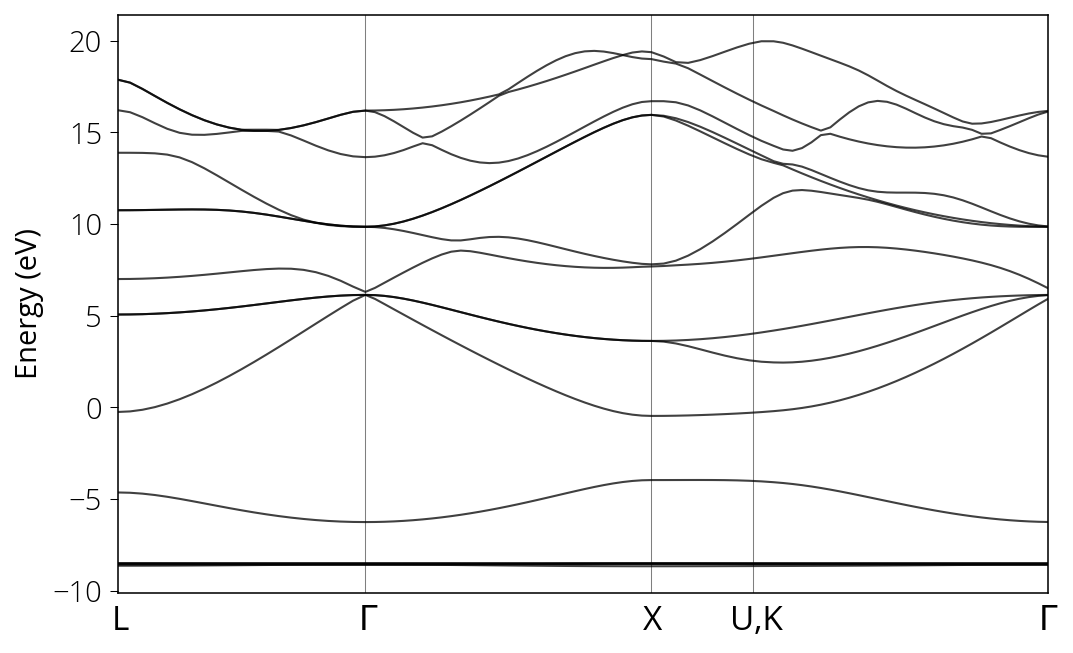

In [3]:
plt.figure(figsize = (8, 5)); 
for ii in range(len(line_breaks)-1):
    if (ii == 0):
        offset=0
    else: 
        offset = 1
        
    plt.plot(k[line_breaks[ii]+offset : line_breaks[ii+1]], \
             e[line_breaks[ii]+offset : line_breaks[ii+1]], \
             linewidth=1, alpha=0.75, color='k') 
plt.xlim(k[0], k[line_breaks[1]-1])
plt.axvline(x=0.8660, linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=1.8660, linewidth=0.5, color='k', alpha=0.5)
plt.axvline(x=2.2196, linewidth=0.5, color='k', alpha=0.5)
# plt.axhline(y=6.6416, linewidth=0.5, color='k', alpha=0.5, linestyle=(0, (5, 5)))
plt.xticks([])
plt.ylabel('Energy (eV)')
# plt.text(2.3, 5.6, 'Fermi energy', fontsize= small)
plt.gcf().text(0.12, 0.06, 'L', fontsize=16, fontweight='normal')
plt.gcf().text(0.325, 0.06, '$\Gamma$', fontsize=16, fontweight='normal')
plt.gcf().text(0.563, 0.06, 'X', fontsize=16, fontweight='normal')
plt.gcf().text(0.635, 0.06, 'U,K', fontsize=16, fontweight='normal')
plt.gcf().text(0.892, 0.06, '$\Gamma$', fontsize=16, fontweight='normal')
plt.show()